![../docs/images/banner-small.png](../docs/images/banner-small.png)

In [7]:
%matplotlib widget
from IPython.display import clear_output
from utils import CarlaEnv, CarlaSimulationConfig
import numpy as np
from dotenv import load_dotenv
import pygame
import os
import sys
import torch
import cv2
load_dotenv()
if os.environ.get("DEV", False):
    sys.path.append("../")
else:
    !pip install invertedai_drive
from invertedai_drive import Drive, Config, Jupyter_Render
clear_output()

Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

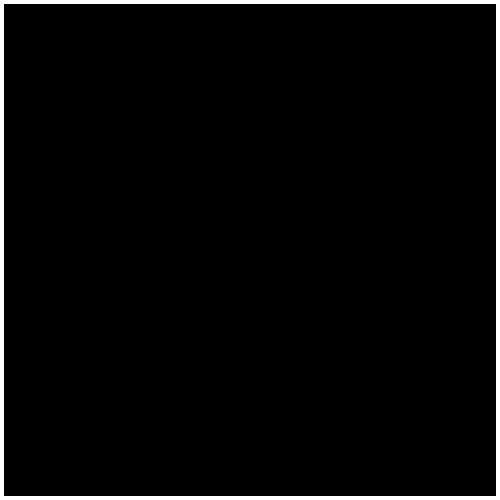

In [8]:
iai_config = Config(
    api_key=" ",
    location="Town03_Roundabout",
    obs_length=1,
    step_times=1,
    agent_count=100,
    batch_size=1,
    min_speed=1,
    max_speed=5,
    carla_simulator=True,
)

simulation_lenght = 30
renderer = Jupyter_Render()
display(renderer)

In [9]:
drive = Drive(iai_config)
response = drive.initialize()
initial_states = response["states"][0]

sim = CarlaEnv.from_preset_data(initial_states=initial_states)
# sim = CarlaEnv.from_preset_data()  # Initial states from Carla
states, recurrent_states, dimensions = sim.reset()
clock = pygame.time.Clock()
frames = []


for i in range(sim.config.episode_lenght * sim.config.fps):
    response = drive.run(
        agent_attributes=torch.tensor(dimensions).unsqueeze(0).tolist(),
        states=torch.tensor(states).unsqueeze(0).tolist(),
        recurrent_states=torch.tensor(recurrent_states).unsqueeze(0).tolist(),
        return_birdviews=True,
    )
    states, recurrent_states, dimensions = sim.step(npcs=response, ego="autopilot")

    clock.tick_busy_loop(sim.config.fps)
    birdview = cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)
clear_output()

In [10]:
sim.destroy()